In [ ]:
# recurrent neural networks

In [3]:
from keras.datasets import imdb
from keras.utils.data_utils import pad_sequences


max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 45s 279ms/step - loss: 0.6151 - acc: 0.6514 - val_loss: 0.4959 - val_acc: 0.7710
Epoch 2/10
157/157 [==============================] - 36s 228ms/step - loss: 0.4109 - acc: 0.8296 - val_loss: 0.3996 - val_acc: 0.8228
Epoch 3/10
157/157 [==============================] - 25s 161ms/step - loss: 0.3054 - acc: 0.8773 - val_loss: 0.3641 - val_acc: 0.8516
Epoch 4/10
157/157 [==============================] - 26s 163ms/step - loss: 0.2522 - acc: 0.9013 - val_loss: 0.3856 - val_acc: 0.8306
Epoch 5/10
157/157 [==============================] - 25s 157ms/step - loss: 0.2082 - acc: 0.9211 - val_loss: 0.6341 - val_acc: 0.7932
Epoch 6/10
157/157 [==============================] - 27s 175ms/step - loss: 0.1483 - acc: 0.9470 - val_loss: 0.4510 - val_acc: 0.8132
Epoch 7/10
 36/157 [=====>........................] - ETA: 17s - loss: 0.1009 - acc: 0.9659

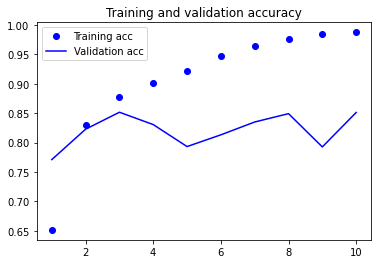

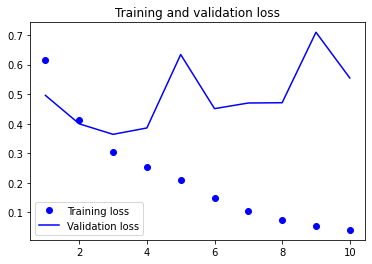

In [8]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
# Part of the problem is that your inputs only consider the first 500 words, 
# rather than full sequences—hence, the RNN has access to less information than the earlier baseline model. 
# The remainder of the problem is that SimpleRNN isn’t good at processing long sequences, such as text.

In [ ]:
# Understanding the LSTM and GRU layers

In [9]:
from keras.layers import LSTM


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 98s 614ms/step - loss: 0.4978 - acc: 0.7625 - val_loss: 0.4381 - val_acc: 0.8020
Epoch 2/10
157/157 [==============================] - 102s 652ms/step - loss: 0.2925 - acc: 0.8844 - val_loss: 0.3536 - val_acc: 0.8472
Epoch 3/10
157/157 [==============================] - 100s 635ms/step - loss: 0.2295 - acc: 0.9140 - val_loss: 0.3569 - val_acc: 0.8500
Epoch 4/10
157/157 [==============================] - 103s 659ms/step - loss: 0.1997 - acc: 0.9254 - val_loss: 0.4194 - val_acc: 0.8442
Epoch 5/10
157/157 [==============================] - 96s 609ms/step - loss: 0.1719 - acc: 0.9375 - val_loss: 0.3513 - val_acc: 0.8640
Epoch 6/10
157/157 [==============================] - 100s 639ms/step - loss: 0.1529 - acc: 0.9464 - val_loss: 0.3324 - val_acc: 0.8836
Epoch 7/10
157/157 [==============================] - 101s 643ms/step - loss: 0.1395 - acc: 0.9497 - val_loss: 0.3239 - val_acc: 0.8878
Epoch 8/10
157/157 [==============================